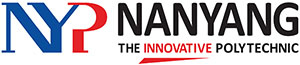


# Practical: k-Nearest Neighbours


## Objectives

- Learn to apply the k-Nearest Neighbours (k-NN) algorithm using Python, Numpy and Scikit-Learn.
- Implement a k-NN algorithm to find the nearest neighbour.
- Use Scikit-Learn in-built library to perform k-NN search.
- Use k-NN for imputation.
- Use k-NN for classification.




## Introduction
The k-Nearest Neighbour (k-NN) is a widely used algorithm that can be applied to many different problems. We can use k-NN for classification or imputing missing values in our dataset. The idea behind the algorithm is intuitive and one that we uses instinctively - we simply assume things that are similar to each other works in a similar manner.

In this practical, we will see how we can apply the k-NN algorithm to a set of data for imputing missing values and classification.

We will first write the codes from scratch to have a better understanding of the algorithm and subsequently use Scikit-Learn for efficiency and easy of use.

## k-NN Using Python and Numpy

We will now implement k-NN using Python with the help of Numpy. The implementation is to ensure that you have good grasp of the concept behind k-NN. In this implementation, we will use Euclidean distance as a measurement of the similarity among data points. To find the nearest neighbour of a data point, we will calculate the distances to all other data points and choose the one that is nearest (with the shortest distance).

We assume that you have started a new notebook.

### Step 1
In the first cell, type in the following codes to import numpy and enter some testing data:

```python
import numpy as np

#The variable data is a numpy array holding a 2-dimensional dataset
data = np.array([
    [0, 10],
    [1, 9],
    [2, 2],
    [3, 5],
    [4, 15],
    [5, 9],
    [7, 1],
    [8, 8],
    [9, 4]
    ])

#We are looking for the nearest neighbour of the search point [5, 2]
searchpoint = np.array([[6,2]])
```



In [1]:
#Enter your codes here
import numpy as np

data = np.array([
  [0, 10],
  [1, 9],
  [2, 2],
  [3, 5],
  [4, 15],
  [5, 9],
  [7, 1],
  [8, 8],
  [9, 4]
])

searchpoint = np.array([[6,2]])

The above codes set up the data and the search point for which we want to search for the nearest neighbour.
We can visualize the data by generating a scatter plot

### Step 2

Add a cell with the following codes to visualize the data using a scatter plot.

```python
import matplotlib.pyplot as plot

#Create a figure
plot.figure()
#Set the title of the chart
plot.title("Plot of X vs Y")
#Set the label for the x-axis
plot.xlabel("x")
#Set the label for the y-axis
plot.ylabel("y")
#Set the data to be plotted
#data[:,0] means all rows in first column
#data[:,1] means all rows in second column
#c=”red” will print the data point using a red marker
plot.scatter(data[:,0], data[:,1], c="red")
#Add the search point as another data to be plotted
#marker=”x” will print the search point using a “x” symbol.
plot.scatter(searchpoint[:, 0], searchpoint[:, 1], c="blue", marker="x")
plot.show()
```


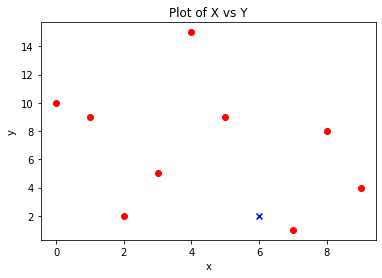

In [8]:
#Create a plot here to visualize the data
import matplotlib.pyplot as plot

plot.figure()
plot.title("Plot of X vs Y")
plot.xlabel("x")
plot.ylabel("y")

plot.scatter(data[:,0], data[:,1], c="red")
plot.scatter(searchpoint[:,0], searchpoint[:,1], c="blue", marker="x")

plot.show()

Execute the codes and you should see a figure as follows:

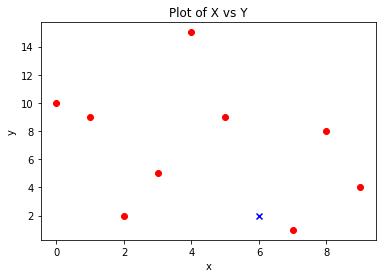

The red dots are our data points and the blue “x” symbol is our search point. By visual inspection, we know that [7,1] should be our nearest neighbour.

Let us get the machine to do the searching for us using a k-NN algorithm.

### Step 3

In a new cell, key in the following Python codes that implements a k-NN algorithm.

```python
#Calculates distances from all points to the search point
#note that axis = 1 means sum by rows
distances = np.sqrt(np.sum((data - searchpoint)**2, axis=1)) 

#The function argmin calculates the index of the array element with the 
#smallest value and in this case, the shortest distance
index_nearest_neighbour = np.argmin(distances)

#Print out the nearest neighbour, you should get [7, 1]
print("Nearest Neighbour={}".format(data[index_nearest_neighbour, :]))
#Print out the distance
print("Distance={}".format(distances[index_nearest_neighbour]))
```


In [27]:
#Enter codes for k-NN here
# distance = np.sqrt(np.sum((data - searchpoint) ** 2, axis=1))

# Break down of the eq
# For each point in data, subtract it with searchpoint. By doing so, we know the distance between each point in data with search point.
# We can see that this is a blute force appoarch, as all points in data must be calculated. 
subtrackDataWithSP = (data - searchpoint)

# Square the result as likely there will be negative value. Negative value must be taken into consideration as it measures the distance.
# When squaring, all negative will becomes positive.
sqSubtractedWithSp = subtrackDataWithSP ** 2;

# We then sum each row together, which will return a 1D list.
sumSqSubtractedWithSp = np.sum(sqSubtractedWithSp, axis=1)

# As we have squared the value previously to make all negative number positive, we will need to square root it back to get the original distance.T
distance = np.sqrt(sumSqSubtractedWithSp)
print(distance)

# As we have the list of distance between the search point, we just need to get the minimum value.
# Take note that argmin returns the array position of the minimum value, not the actual number. Hence, in this case, it returns position 6.
# if you perform a distance[6], you will get the actual value.
index_nearest_neighbour = np.argmin(distance)

# As the data, or any of the calculation above didn't sort or manipulate the row position, we can just use data[6, :] to get the data on that position.
# In this case, position 6 is [7, 1]
print("Nearest Neighbour={}".format(data[index_nearest_neighbour, :]))

# This is just to print out with is the shortest distance. We already know position 6 is the shortest distance, using the np.argmin function.
#Print out the distance
print("Distance={}".format(distance[index_nearest_neighbour]))


[10.          8.60232527  4.          4.24264069 13.15294644  7.07106781
  1.41421356  6.32455532  3.60555128]
Nearest Neighbour=[7 1]
Distance=1.4142135623730951


Read the comments carefully, they provide  explanations for each of the steps.

### Step 4

Run the codes by clicking on the Cell->Run Cells command. You should get the nearest neighbour as [7, 1] with a distance value of 1.41421356.

Try it out with other values to see if the implementation works as expected.

## k-NN with Scikit-Learn

Usually we do not have to implement algorithms ourselves, we can use open source libraries with more efficient and proven implementations. Let us now see how we can use scikit-learn to perform k-NN.

### Step 5

Add the following codes to a new cell:

```python
import numpy as np
from sklearn.neighbors import NearestNeighbors as knn

data = np.array([
    [0, 10],
    [1, 9],
    [2, 2],
    [3, 5],
    [4, 15],
    [5, 9],
    [7, 1],
    [8, 8],
    [9, 4]
    ])

searchpoint = np.array([[6,2]])

#As in standard scikit-learn operations, we first call the fit function
#with our data. The number 1 means we are only looking for 1 neighbour. Also
#See the next section for explanation on the algorithm=”brute” parameter
model = knn(n_neighbors=1, algorithm="brute").fit(data)
#Call the kneighbors function to begin the search for the nearest neighbour 
distance, indices = model.kneighbors(searchpoint)
#The function will return the index of the nearest neighbour as well as the
#distance between the two points
print(distance)
print(data[indices])
```

### Step 6

Again, run the cells and you should see that the answer is again [7,1] and the distance is 1.41421356.


In [30]:
#Use Scikit-learn's k-NN alogrithm

from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors as knn

model = knn(n_neighbors=1, algorithm="brute").fit(data)

distance, indices = model.kneighbors(searchpoint)

print(distance)
print(data[indices])

# This is an easier way to perform KNN, using the KNN library from sklearn.
# It will gives the same result as our previous algorithm, but must ensure we select "blute" as the algorithm.
# There are also KD-Tree algorithm we can use. Refer to the L1 slides for more information.

[[1.41421356]]
[[[7 1]]]



### Algorithm=Brute vs kd_tree vs ball_tree

The algorithm parameter indicates how we want the k-NN algorithm to search for the nearest neighbour. If we specify  ```brute```, it uses brute force method by calculating the distance between the search point and all the data points as we have done previously in our own implementation. However, this method is inefficient and is computational intensive with large number of data points and features. In such cases, we should switch to either ```kd_tree``` or ```ball_tree```. 

We can also indicate ```auto``` for the algorithm parameter. In this case, we leave it to Scikit-Learn to figure out which is the best method to use. Note that if the algorithm parameter is not specified, it is defaulted to using ```auto```.
Refer to http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms for a detailed discussion of the algorithms and their merits.

## k-NN Imputation

A common use of k-NN is for imputing missing values in a data set. The idea is that when there is a missing value in a data sample, we can replace the missing values with one from a similar sample. We find the nearest neighbour and use the value from the nearest neighbout as a substitutional value.

Let us see how that works. We will be using Pandas and Scikit-Learn’s k-NN algorithm. Pandas helps us by providing a rich set of libraries for handling datasets.

### Step 7

Make sure that you have downloaded a copy of the _SmokersMissingValues.csv file_. The codes below will prompt to upload a copy of the data.

### Step 8

Start a new notebook or use a new cell and add the following codes:

```python
import numpy as np
import pandas as pd
import io
from sklearn.neighbors import NearestNeighbors as knn
from google.colab import files

#Upload our data file
smokers_data = files.upload()

#Read in data from the csv file using Pandas’s read_csv function
df = pd.get_dummies(pd.read_csv(io.BytesIO(smokers_data['SmokersMissingValues.csv']), index_col="Year"))
df
```

In [ ]:
#Enter your codes to read in SmokerMissingValues.csv here



You should see a list of values data with 2 missing values (indicated as NaN) in year 1988 and 2007.

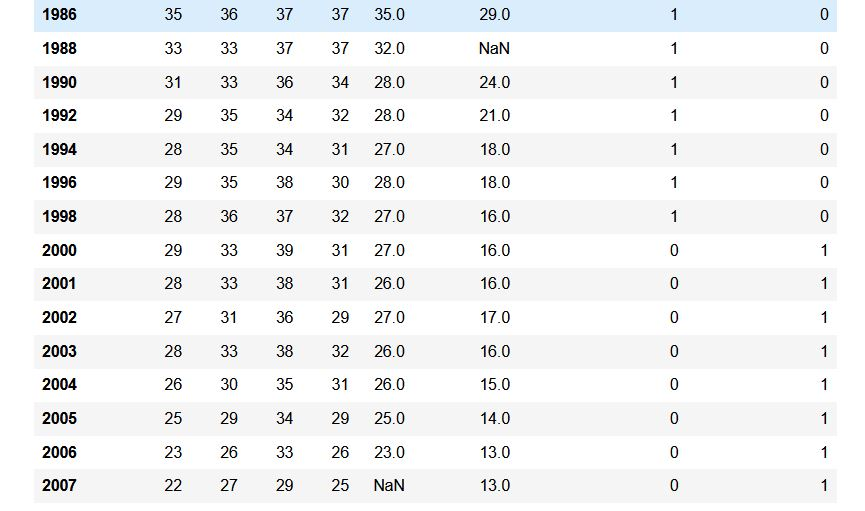

We will now use k-NN imputer offered by Scikit-Learn to automatically find the nearest neighbour and use the values from the neighbour as substitution.

Enter the following codes to run the k-NN imputation process:

```python
#Import the KNNImputer
from sklearn.impute import KNNImputer

#Create a new Imputer with k=1
#We will only use the nearest neighbour
imputer = KNNImputer(n_neighbors=1)
#The fit_transform will return a numpy array
#with all values filled in, we replace our dataframe values with that 
#from the imputer
df[:] = imputer.fit_transform(df)
#print out and take a look at the result
df.loc[[1988, 2007]]
```

*Note that k-NN imputer in Scikit-Learn is a recent addition, it is only available from version 0.22 and above]*


In [ ]:
#Enter your codes here


You should see that the NaN values for year 1988 and 2007 has been imputed with values 29.0 and 20.0 respectively

<pre>
16 and Over 	16-24 	25-34 	35-49 	50-59 	60 and Over 	Method_Unweighted 	Method_Weighted
Year 								
1988 	33.0 	33.0 	37.0 	37.0 	32.0 	<b>29.0</b> 	1.0 	0.0
2007 	22.0 	27.0 	29.0 	25.0 	<b>20.0</b> 	13.0 	0.0 	1.0
</pre>

### Exercise

Use the codes below to try out interpolation using the nearest method.

```python
df = pd.get_dummies(pd.read_csv(io.BytesIO(smokers_data['SmokersMissingValues.csv']), index_col="Year"))
df = df.interpolate(method="nearest")
df.loc[[1988, 2007]]
```
Compare the results from using k-NN and interpolation. You should note that you may not get the same results from k-NN as they used different algorithms.


In [ ]:
#Enter your codes here


Note:

1. Before version 0.22, sckit-learn perform missing values imputation using mean, median or most frequent values but it does not support k-NN imputation. The k-NN imputation above only works for version 0.22 onwards, if you get an error, make sure to update your scikit-learn package.
2. Alterative implementation are also available as add-on https://github.com/scikit-learn/scikit-learn/issues/2989 and fancyimpute (https://pypi.org/project/fancyimpute/) instead.
3. Pandas also support operations to impute missing values, but it also does not support k-NN. It does support fill-forward, fill-backward and interpolation which are very useful for data that has certain trends. Alternatively, you can also replace missing values with fixed or mean values.

## k-NN Classifier

k-NN can also be used to implement a classifier. Since Scikit-Learn already provided us with a k-NN classifier, our job is much easier.
We will use a simple data set ```churn_classifier.csv``` file to illustrate the use of the k-NN classifier.

### Step 9

Download the file ```churn_classifier.csv```.

### Step 10

Place the following codes in a new cell. The comments provide the explanation of how the classifier is trained and used for prediction.

```python
import sklearn.datasets as datasets
import pandas as pd

#Upload the churn data
churn_data = files.upload()

#We need to import the k-NN Classifier from skleart.neighbors
from sklearn.neighbors import KNeighborsClassifier
#Read in the CSV file, set the Id column as the index
df = pd.read_csv(io.BytesIO(churn_data['churn_classifier.csv']), index_col="Id")
#Print out the first 10 rows for visual inspection
print(df.head(5))

#Set the CHURNED column as our label (target value to be predicted)
YTrain = df["CHURNED"]
#Remove the CHURNED column from our input variables
XTrain = df.drop("CHURNED", axis=1)
#Create a k-NN Classifier
classifier = KNeighborsClassifier(n_neighbors=3)
#Train the classifier using our training data
classifier.fit(XTrain.values, YTrain.values)

#Let us test, note that our testing data is similar to row with id 0 and 8
#Expected result is 1 (likely) and 0 (unlikely)
XTest = pd.DataFrame([
[5.2, 7.5, 80.1, 0, 53, 0, 1, 1, 23000.00, 1],
[15.0, 4.5, 30.1, 0, 35, 1, 0, 0, 90000.00, 1]
])

#Iterate through each row and do the predicton
for index, row in XTest.iterrows():
    if classifier.predict(row.values.reshape(1, -1))[0] == 0:
        print("Customer not likely to terminate contract")
    else:
        print("Customer likely to terminate contract")   
```

In [12]:
#Enter your codes here to run Scikit-Learn k-NN classifier
import sklearn.datasets as datasets
import pandas as pd

# Upload the churn data
churn_data = files.upload()

# We need to import the k-NN Classifier from skleart.neighbors
from sklearn.neighbors import KNeighborsClassifier
# Read in the CSV file, set the Id column as the index
df = pd.read_csv(io.BytesIO(churn_data['churn_classifier.csv']), index_col="Id")
# Print out the first 10 rows for visual inspection
print(df.head(5))

# Set the CHURNED column as our label (target value to be predicted)
YTrain = df["CHURNED"]
# Remove the CHURNED column from our input variables
XTrain = df.drop("CHURNED", axis=1)
# Create a k-NN Classifier
classifier = KNeighborsClassifier(n_neighbors=3)
# Train the classifier using our training data
classifier.fit(XTrain.values, YTrain.values)

# Let us test, note that our testing data is similar to row with id 0 and 8
# Expected result is 1 (likely) and 0 (unlikely)
XTest = pd.DataFrame([
[5.2, 7.5, 80.1, 0, 53, 0, 1, 1, 23000.00, 1],
[15.0, 4.5, 30.1, 0, 35, 1, 0, 0, 90000.00, 1]
])

# Iterate through each row and do the predicton
for index, row in XTest.iterrows():
    if classifier.predict(row.values.reshape(1, -1))[0] == 0:
        print("Customer not likely to terminate contract")
    else:
        print("Customer likely to terminate contract")   

Saving churn_classifier.csv to churn_classifier (2).csv
    LONGDIST  International     LOCAL  DROPPED  AGE  SEX  STATUS  CHILDREN  \
Id                                                                           
0    5.24640        7.51510  86.32780        0   57    0       1         2   
3    0.00000        0.00000   3.94229        0   50    0       0         2   
4    5.55564        0.00000   9.36347        1   68    0       1         2   
8   14.01930        5.68043  29.80650        0   34    1       0         0   
10  13.66400        2.95642  32.63810        0   60    1       1         2   

    Est_Income  Car_Owner  CHURNED  
Id                                  
0      27535.3          1        1  
3      64632.3          0        1  
4      81000.9          0        1  
8      87467.1          1        0  
10     83220.6          0        1  
Customer likely to terminate contract
Customer not likely to terminate contract


## Step 11

Execute the codes and you should see the following outputs.

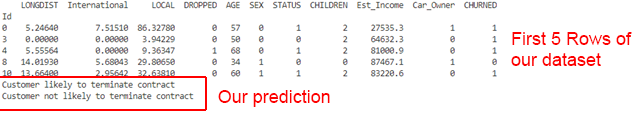

# Conclusion

The practical demonstrate the basic concept of the k-NN algorithm. We also illustrated the common application of the algorithm in imputation and classification using the tools provided by Scikit-Learn and Pandas.